In [1]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from gcsa.recurrence import Recurrence, DAILY, SU, SA

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime, timedelta, date
import dateutil
from dateutil.parser import parse
import calendar
import numpy as np
from circle_cal.model import CalendarElement
import circle_cal as cc
import circle_cal.model as model
import circle_cal.plot as ccplot
import pathlib
from rich import print
import pytz
from pytz import timezone

In [3]:
cred = pathlib.Path('/Users/kdavis10/.config/.credentials')
cred_json = "pygooglecal.apps.googleusercontent.com.json"

try:
    gcal = GoogleCalendar(credentials_path=cred / cred_json)
except Exception as e:
    (cred / "token.pickle").unlink()
print(list(enumerate(gcal.get_calendar_list())))

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=3681359253-cj6ds937cv5p30vn8tbms112bjplms95.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar&state=UrGE2AsTnDwOsllUHLrHWCoT0Vxx2K&access_type=offline


[
    (0, <CalendarListEntry None - (Weather)>),
    (1, <CalendarListEntry None - (Payments)>),
    (2, <CalendarListEntry None - (Axis Ludi Calendar)>),
    (3, <CalendarListEntry None - (NYT Astronomy and Space Calendar)>),
    (4, <CalendarListEntry None - (LIPS 2015)>),
    (5, <CalendarListEntry None - (ND-DVT Provisional Shows)>),
    (6, <CalendarListEntry None - (keithwdavis@gmail.com)>),
    (7, <CalendarListEntry None - (Work)>),
    (8, <CalendarListEntry None - (Cognoscenti)>),
    (9, <CalendarListEntry None - (Academic Calendar)>),
    (10, <CalendarListEntry None - (Descriptive Astronomy)>),
    (11, <CalendarListEntry None - (DVT Student Work Schedule)>),
    (12, <CalendarListEntry None - (PTE Meal Plan (recipes))>),
    (13, <CalendarListEntry None - (LIPS 2013 Calendar (August 2 Revision))>),
    (14, <CalendarListEntry None - (indivisibleIN02 Action Calendar)>),
    (15, <CalendarListEntry None - (Clemson Planetarium)>),
    (16, <CalendarListEntry None - (Birthdays)>),
    (17, <CalendarListEntry None - (Remember The Milk)>),
    (18, <CalendarListEntry None - (Phases of the Moon)>),
    (19, <CalendarListEntry None - ( Wolverhampton)>),
    (20, <CalendarListEntry None - (Chicago Fire)>),
    (21, <CalendarListEntry None - (GenCon 2019)>),
    (22, <CalendarListEntry None - (Holidays in United States)>),
    (23, <CalendarListEntry None - (kdavis10@nd.edu)>),
    (24, <CalendarListEntry None - (DVT Student Work UNAVAILABLE)>),
    (25, <CalendarListEntry None - (Great Lakes Planetarium Association)>),
    (26, <CalendarListEntry None - (Tasks Personal)>),
    (27, <CalendarListEntry None - (Legend Secondary)>),
    (28, <CalendarListEntry None - (Legend Main)>),
    (29, <CalendarListEntry None - (TD Trips)>),
    (30, <CalendarListEntry None - (Food)>),
    (31, <CalendarListEntry None - (Tasks: Work)>),
    (32, <CalendarListEntry None - (TD Work Projects)>)
]

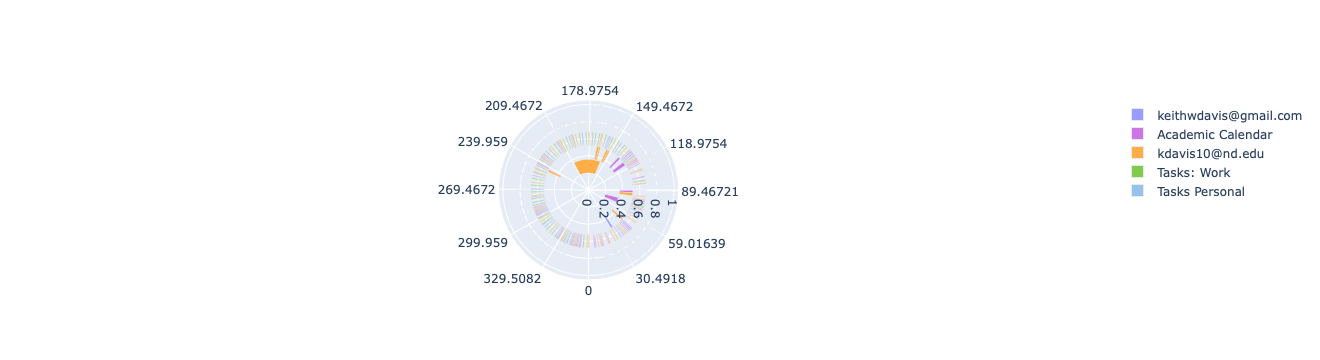

In [49]:
year = y24 = CalendarElement(year=2024)

traces = []

clist = list(gcal.get_calendar_list())

for cid in [6, 9, 23, 31,26]:
    events = gcal.get_events(y24.start.datetime(),
                            y24.stop.datetime(),
                            single_events=True,
                            calendar_id=clist[cid].calendar_id,)
    events = [model.EventWrap(ev) for ev in events if ev.other["eventType"] != "workingLocation"]
    t = ccplot.events_to_trace(events, len(list(year.recursive_iteration("day"))) / 360)
    t.marker.color=clist[cid].background_color
    t.name=clist[cid].to_calendar_list_entry().summary
    traces.append(t)


    

#eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
#eve = [model.EventWrap(ev) for ev in eve if ev.other["eventType"] != "workingLocation"]
#print(len(eve))

#t = ccplot.events_to_trace(eve, 360 / 365)
#t.marker.color=gcal.get_calendar_list_entry().background_color

rot = -90
fig = go.Figure()
fig.add_traces(traces)

#sector = [ccplot.to_theta(y24[4].start.datetime())+rot,
#          ccplot.to_theta(y24[7].stop.datetime())+rot]
fig.update_layout(height=800)

fig.update_layout(dict(polar=
                       dict(angularaxis=
                            dict(direction="counterclockwise",                                 
                                 rotation=rot,
                                 #showticklabels=False,
                                 tickmode="array", tickvals=[ccplot.to_theta(m.stop.datetime()) for m in y24],
                                 ),
                            #sector=sector,
                            
                           ),
 
                      ),
                 ),


fig.show()


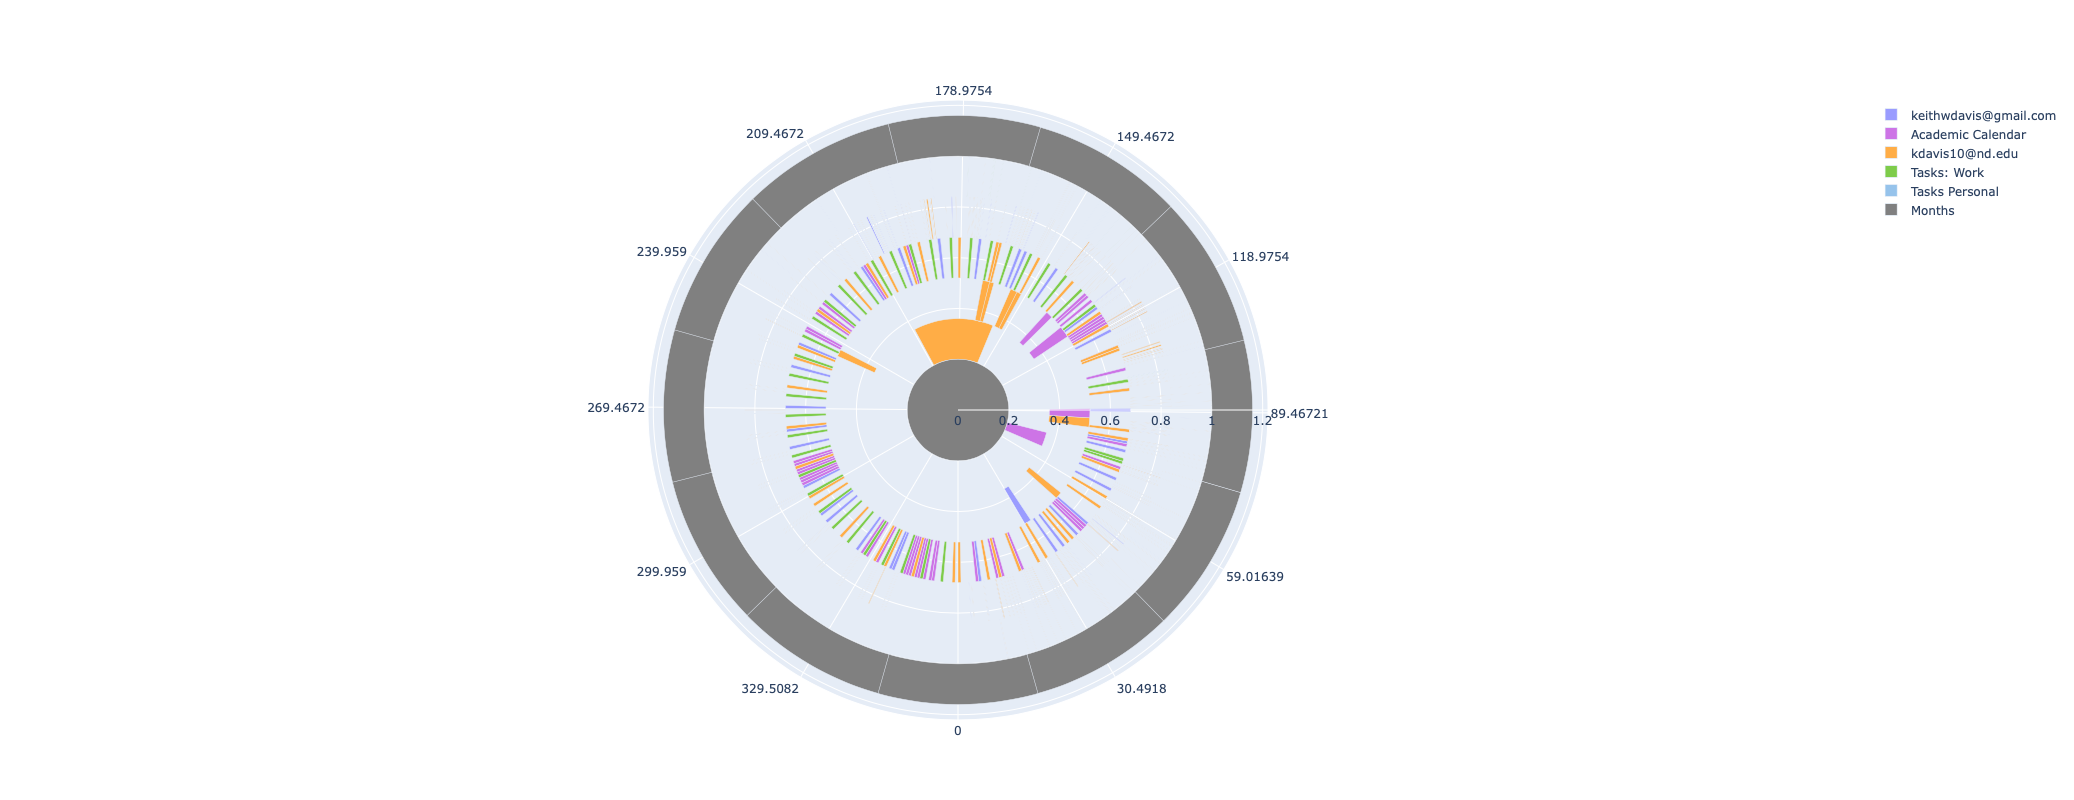

In [50]:
def info_trace():
    now = datetime.now()
    year = model.CalendarElement(year=now.year)
    d_to_t = len(list(year.recursive_iteration("day"))) / 360
    theta = [360]
    base=[0]
    r = [ccplot.POLAR_CORE]
    text = [str(year.year.value)]
    width = [360]

    for m in year:
        r.append(ccplot.DR)
        base.append(1)
        theta.append(ccplot.to_theta(m.mid))
        text.append(m.name)
        width.append(m.duration / timedelta(days=1) * d_to_t)
    return go.Barpolar(r=r, theta=theta, width=width, base=base, marker_color="gray", name="Months", ids=text)

fig.add_trace(info_trace())
fig.show()

In [51]:
mtrace = list(fig.select_traces(selector={"name":"Months"}))[0]
scatterdata = zip(mtrace.r, mtrace.base, mtrace.theta, mtrace.width, mtrace.ids)

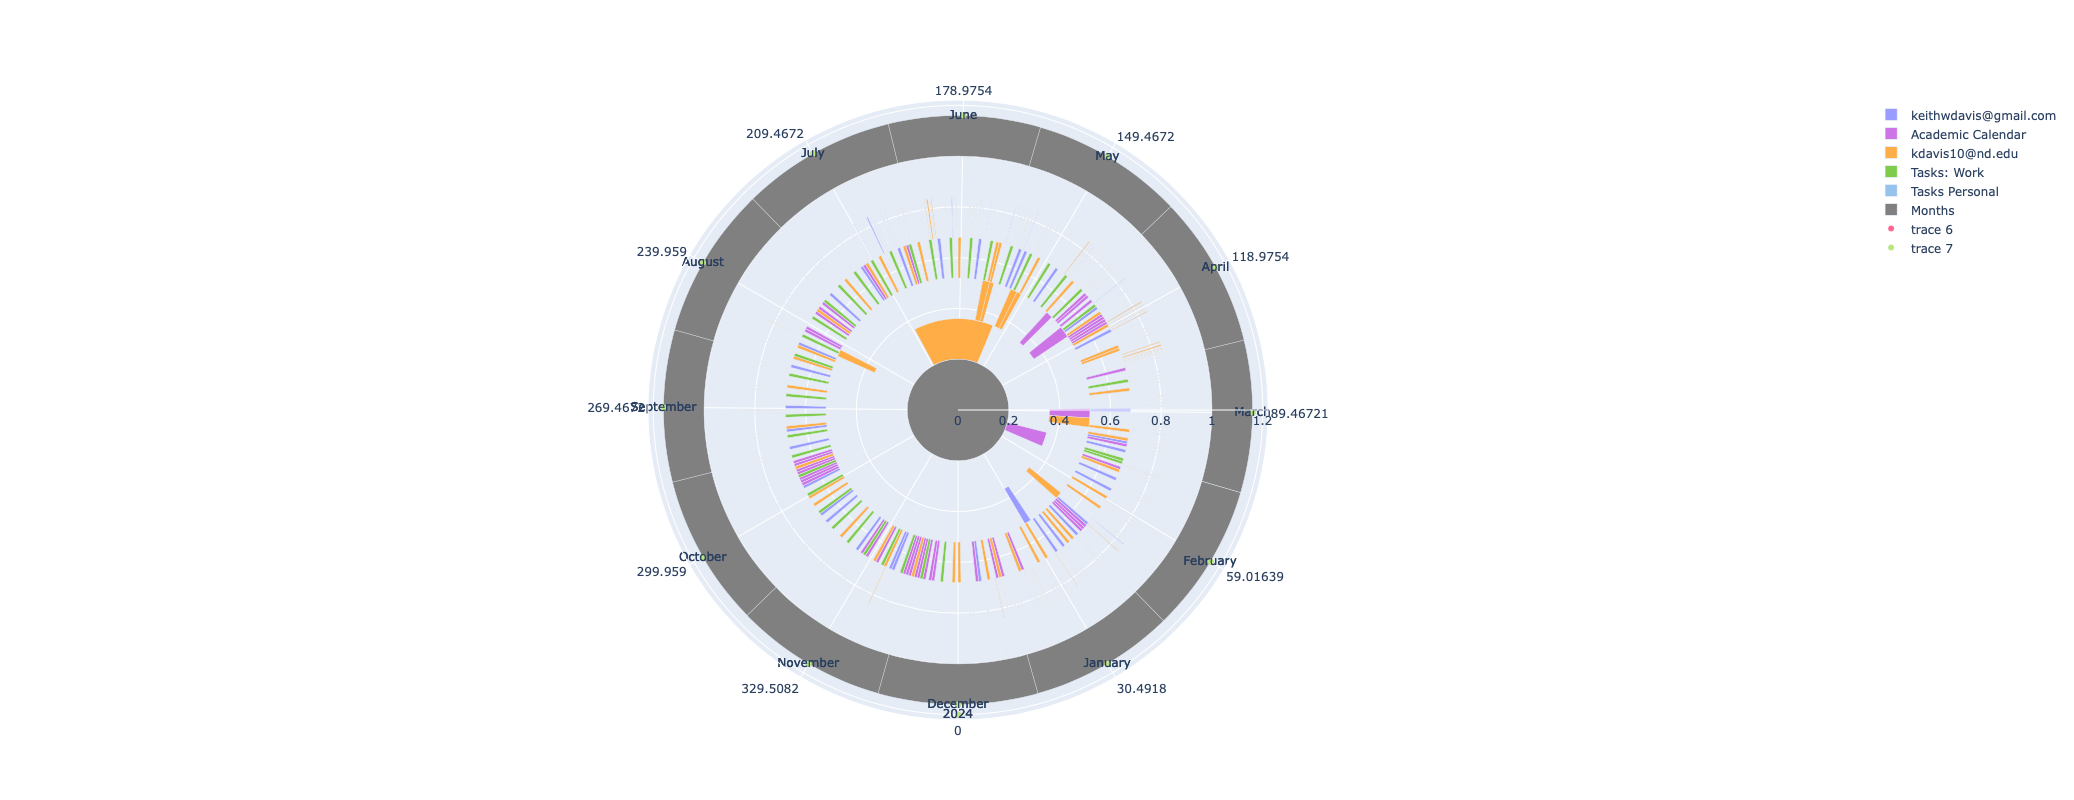

In [53]:
#fig.update_layout(annotations=[dict(x=ccplot.polar_to_cart(r/2+base, theta)[0],
#                                    y=ccplot.polar_to_cart(r/2+base, theta)[1],
#                                    text=_id,
#                                    textangle=180 - theta) for r, base, theta, width, _id in scatterdata])
fig.add_trace(go.Scatterpolar(mode="markers+text", r=np.array(mtrace.r) + 1, theta=mtrace.theta, text=mtrace.ids, marker_angle=mtrace.theta))

In [12]:
year = y24 = CalendarElement(year=2024)

eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
eve = [model.EventWrap(ev) for ev in eve if (ev.end - ev.start) / timedelta(days=1) <=1]

def make_point_trace(events, d_to_th):
    
    r = []
    theta = []
    text = []
    for eve in events:
        r.append(.5)
        theta.append(model.to_theta(eve.mid)),
        #theta.append(eve.mid)
        text.append(" ".join((str(eve.mid), eve.summary)))
        
    t = go.Scatterpolar(r=r, theta=theta, mode="markers",
                        hovertext=text,
                        marker_symbol="diamond-open-dot",
                        )
    return t

t = make_point_trace(eve, 366 / 360)
rot = -90
fig = go.Figure(data=t)
sector = [cc.model.to_theta(y24[4].start.datetime())+rot,
          cc.model.to_theta(y24[7].stop.datetime())+rot]
fig.update_layout(height=1000)

fig.update_layout(dict(polar=
                       dict(angularaxis=
                            dict(direction="counterclockwise",
                                 
                                 rotation=rot,
                                 #showticklabels=False,
                                 tickmode="array", tickvals=[cc.model.to_theta(m.stop.datetime()) for m in y24],
                                 ),
                            sector=sector,
                            
                           ),
 
                      ),
                 ),


fig.show()

print(eve[0].mid)

AttributeError: module 'circle_cal.model' has no attribute 'to_theta'

In [12]:
year[0].value

1

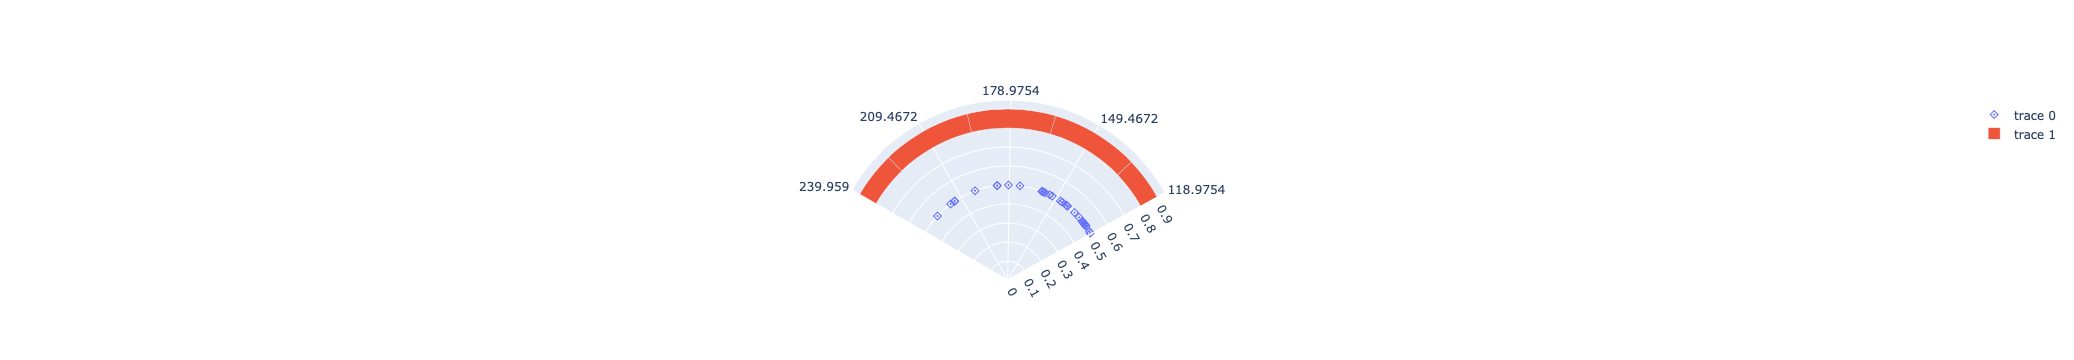

In [28]:
fig.add_trace(go.Barpolar(base = [.8] * len(year[3:8]),
                          r=[.1] * len(year[3:8]),
                          theta=[model.to_theta(m.mid) for m in year[3:8]],
                          width=[len(m) * 366 / 360 for m in year[3:8]]))
fig.show()

In [34]:
cals = list(gcal.get_calendar_list())

In [10]:
m = CalendarElement(year=2024)[0]

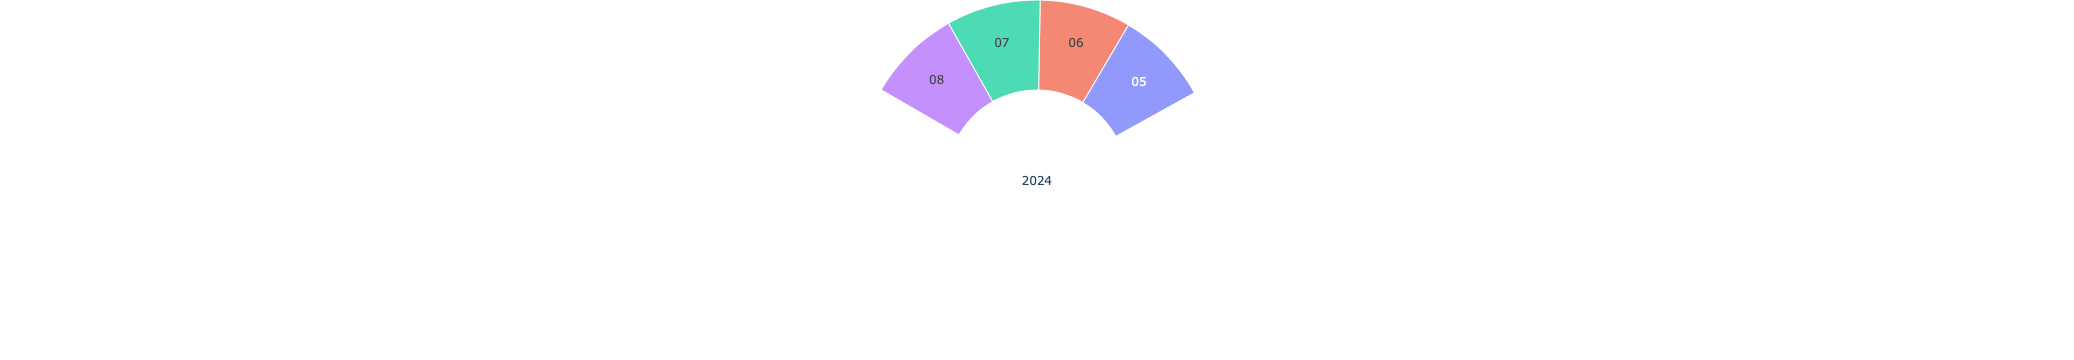

In [18]:
yeard = dict(labels=[str(year.year)] + [str(m.month) for m in year[4:8]],
             parents=[""] + [str(year.year)] * len(year[4:8]),
             values=[366] + [len(m) for m in year[4:8]]
            )
sbfig =go.Figure(go.Sunburst(
    labels=yeard["labels"],
    parents=yeard["parents"],
    values=yeard["values"],
    sort=False,
    rotation=model.to_theta(year[4][0].datetime())-90,
    branchvalues="total",
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
sbfig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

sbfig.show()

[{'year': 2024, 'month': 5, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 6, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 7, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 8, 'type': 'CalendarElement'}]

In [45]:
datetime(2024, 2, 30) in y24

ValueError: day is out of range for month

In [11]:
from gcsa.serializers.event_serializer import EventSerializer
print(EventSerializer.to_json(eve[289].gcsaevent))

{
    'id': 'pvmunjs5h896ot3ae9s79c5nb8_20240607',
    'summary': 'Jordan (Office)',
    'recurrence': [],
    'visibility': 'public',
    'attendees': [],
    'guestsCanInviteOthers': True,
    'guestsCanModify': False,
    'guestsCanSeeOtherGuests': True,
    'transparency': 'transparent',
    'attachments': [],
    'kind': 'calendar#event',
    'etag': '"3412066700954000"',
    'status': 'confirmed',
    'htmlLink': 
'https://www.google.com/calendar/event?eid=cHZtdW5qczVoODk2b3QzYWU5czc5YzVuYjhfMjAyNDA2MDcga2RhdmlzMTBAbmQuZWR1',
    'originalStartTime': {'date': '2024-06-07'},
    'iCalUID': 'pvmunjs5h896ot3ae9s79c5nb8@google.com',
    'sequence': 0,
    'workingLocationProperties': {
        'type': 'officeLocation',
        'officeLocation': {'buildingId': '1193', 'label': 'Jordan'}
    },
    'eventType': 'workingLocation',
    'start': {'date': '2024-06-07'},
    'end': {'date': '2024-06-08'},
    'reminders': {'useDefault': False}
}

In [14]:
eve[289].gcsaevent.other["eventType"]

'workingLocation'

In [22]:
print(list(scatterdata))

[]

In [23]:
mtrace = list(fig.select_traces(selector={"name":"Months"}))[0]
scatterdata = zip(mtrace.r, mtrace.base, mtrace.theta, mtrace.width, mtrace.ids)

In [25]:
list(scatterdata)

[(0.2, 0, 360, 360, '2024'),
 (0.16, 1, 30.491803278688526, 31.516666666666666, 'January'),
 (0.16, 1, 59.01639344262295, 29.48333333333333, 'February'),
 (0.16, 1, 89.46721311475409, 31.516666666666666, 'March'),
 (0.16, 1, 118.97540983606557, 30.5, 'April'),
 (0.16, 1, 149.46721311475412, 31.516666666666666, 'May'),
 (0.16, 1, 178.97540983606558, 30.5, 'June'),
 (0.16, 1, 209.46721311475412, 31.516666666666666, 'July'),
 (0.16, 1, 239.95901639344262, 31.516666666666666, 'August'),
 (0.16, 1, 269.4672131147541, 30.5, 'September'),
 (0.16, 1, 299.9590163934426, 31.516666666666666, 'October'),
 (0.16, 1, 329.5081967213115, 30.5, 'November'),
 (0.16, 1, 0.0, 31.516666666666666, 'December')]